# Важно подчеркнуть, что мы позиционируем себя как продуктовые аналитики.

# Задачи банковского кейса

## Основная часть исследовательского анализа

## Загрузка данных

Данные взяты с сайта kaggle
[банковские транзакции](https://www.kaggle.com/datasets/shivamb/bank-customer-segmentation)

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('/content/drive/MyDrive/ZEROCODER_Python_для_ан_данных/14_урок_по_Python_Кейс-урок_в_портфолио/bank_clients_transactions.csv')

In [39]:
df

,transactionID,customerID,customerDOB,custGender,custLocation,custAccountBalance,transactionDate,transactionTime,transactionamountInr,age,age_group,transactionTime_minutes,transactionTime_min
0,T1,C5841053,1970-01-01 00:00:00.000000030,F,JAMSHEDPUR,17819.05,2016-02-08,143207,25.0,46,45-59,2.386783,2.386783
1,T2,C2142763,1969-12-31 23:59:59.999999968,M,JHAJJAR,2270.69,2016-02-08,141858,27999.0,46,45-59,2.364300,2.364300
2,T3,C4417068,1970-01-01 00:00:00.000000028,F,MUMBAI,17874.44,2016-02-08,142712,459.0,46,45-59,2.378533,2.378533
3,T4,C5342380,1969-12-31 23:59:59.999999951,F,MUMBAI,866503.21,2016-02-08,142714,2060.0,46,45-59,2.378567,2.378567
4,T5,C9031234,1970-01-01 00:00:00.000000037,F,NAVI MUMBAI,6714.43,2016-02-08,181156,1762.5,46,45-59,3.019267,3.019267
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048562,T1048563,C8020229,1970-01-01 00:00:00.000000034,M,NEW DELHI,7635.19,2016-09-18,184824,799.0,46,45-59,3.080400,3.080400
1048563,T1048564,C6459278,1970-01-01 00:00:00.000000033,M,NASHIK,27311.42,2016-09-18,183734,460.0,46,45-59,3.062233,3.062233
1048564,T1048565,C6412354,1970-01-01 00:00:00.000000036,M,HYDERABAD,221757.06,2016-09-18,183313,770.0,46,45-59,3.055217,3.055217
1048565,T1048566,C6420483,1970-01-01 00:00:00.000000046,M,VISAKHAPATNAM,10117.87,2016-09-18,184706,1000.0,46,45-59,3.078433,3.078433


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1041614 entries, 0 to 1048566
Data columns (total 13 columns):
 #   Column                   Non-Null Count    Dtype         
---  ------                   --------------    -----         
 0   transactionID            1041614 non-null  object        
 1   customerID               1041614 non-null  object        
 2   customerDOB              1041614 non-null  datetime64[ns]
 3   custGender               1041614 non-null  object        
 4   custLocation             1041614 non-null  object        
 5   custAccountBalance       1041614 non-null  float64       
 6   transactionDate          1041614 non-null  datetime64[ns]
 7   transactionTime          1041614 non-null  int64         
 8   transactionamountInr     1041614 non-null  float64       
 9   age                      1041614 non-null  int64         
 10  age_group                1041614 non-null  category      
 11  transactionTime_minutes  1041614 non-null  float64       
 12  trans

## Приведение столбцов к стилю camel_case

In [5]:
def to_camel_case(s):
    parts = s.split('_')
    if len(parts) == 1:
        # Если нет подчеркиваний, то просто привести к camelCase
        s = s.replace(' ', '')
        return s[0].lower() + s[1:]
    # Если есть подчеркивания, то объединяем части, первая с маленькой буквы, остальные с заглавной
    return parts[0].lower() + ''.join(word.title() for word in parts[1:])

# Для исходных названий столбцов с возможными пробелами и скобками сделаем замену пробелов и скобок на _
new_columns = []
for col in df.columns:
    col_processed = col.replace(' ', '_').replace('(', '').replace(')', '').replace('.', '')
    new_columns.append(to_camel_case(col_processed))

df.columns = new_columns

print(df.columns)

Index(['transactionID', 'customerID', 'customerDOB', 'custGender',
       'custLocation', 'custAccountBalance', 'transactionDate',
       'transactionTime', 'transactionamountInr'],
      dtype='object')


Описание

- Убираем пробелы и скобки, заменяя на подчеркивания для удобства обработки.  
- Преобразуем названия в camelCase (первая буква маленькая, последующие слова — с заглавной).  
- Применяем это к столбцам датафрейма.

В итоге столбцы станут такими:

['transactionID', 'customerID', 'customerDOB', 'custGender', 'custLocation', 'custAccountBalance', 'transactionDate', 'transactionTime', 'transactionAmountInr']

## Привести типы данных — даты должны быть в формате datetime

Чтобы привести столбцы с датами к типу datetime в pandas, используем функцию pd.to_datetime.

 В твоём датафрейме, судя по названиям, это столбцы customerDOB и transactionDate.

In [6]:
# Приведение CustomerDOB и TransactionDate к datetime
df['customerDOB'] = pd.to_datetime(df['customerDOB'], errors='coerce')
df['transactionDate'] = pd.to_datetime(df['transactionDate'], errors='coerce')

# Проверка типов данных
print(df.dtypes)#привести дату к типу datetime

<ipython-input-6-d14956b11316>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['customerDOB'] = pd.to_datetime(df['customerDOB'], errors='coerce')


transactionID                   object
customerID                      object
customerDOB             datetime64[ns]
custGender                      object
custLocation                    object
custAccountBalance             float64
transactionDate         datetime64[ns]
transactionTime                  int64
transactionamountInr           float64
dtype: object


<ipython-input-6-d14956b11316>:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['transactionDate'] = pd.to_datetime(df['transactionDate'], errors='coerce')


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048567 entries, 0 to 1048566
Data columns (total 9 columns):
 #   Column                Non-Null Count    Dtype         
---  ------                --------------    -----         
 0   transactionID         1048567 non-null  object        
 1   customerID            1048567 non-null  object        
 2   customerDOB           1045170 non-null  datetime64[ns]
 3   custGender            1047467 non-null  object        
 4   custLocation          1048416 non-null  object        
 5   custAccountBalance    1046198 non-null  float64       
 6   transactionDate       1048567 non-null  datetime64[ns]
 7   transactionTime       1048567 non-null  int64         
 8   transactionamountInr  1048567 non-null  float64       
dtypes: datetime64[ns](2), float64(2), int64(1), object(4)
memory usage: 72.0+ MB


## Поиск дублей и пропусков в данных

In [8]:
# Поиск дубликатов
duplicates = df.duplicated()
print(f'Количество дубликатов: {duplicates.sum()}')

Количество дубликатов: 0


In [9]:
# Удаление дубликатов
df = df.drop_duplicates()

In [10]:
# Поиск пропусков
missing_values = df.isnull().sum()
print('Количество пропусков в каждом столбце:')
print(missing_values)

Количество пропусков в каждом столбце:
transactionID              0
customerID                 0
customerDOB             3397
custGender              1100
custLocation             151
custAccountBalance      2369
transactionDate            0
transactionTime            0
transactionamountInr       0
dtype: int64


In [11]:
# Удаление строк с пропусками
df = df.dropna()

## Исследовательский анализ данных

In [12]:
df

,transactionID,customerID,customerDOB,custGender,custLocation,custAccountBalance,transactionDate,transactionTime,transactionamountInr
0,T1,C5841053,1994-10-01,F,JAMSHEDPUR,17819.05,2016-02-08,143207,25.0
1,T2,C2142763,2057-04-04,M,JHAJJAR,2270.69,2016-02-08,141858,27999.0
2,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2016-02-08,142712,459.0
3,T4,C5342380,2073-09-14,F,MUMBAI,866503.21,2016-02-08,142714,2060.0
4,T5,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2016-02-08,181156,1762.5
...,...,...,...,...,...,...,...,...,...
1048562,T1048563,C8020229,1990-08-04,M,NEW DELHI,7635.19,2016-09-18,184824,799.0
1048563,T1048564,C6459278,1992-02-20,M,NASHIK,27311.42,2016-09-18,183734,460.0
1048564,T1048565,C6412354,1989-05-18,M,HYDERABAD,221757.06,2016-09-18,183313,770.0
1048565,T1048566,C6420483,1978-08-30,M,VISAKHAPATNAM,10117.87,2016-09-18,184706,1000.0


### определи количество клиентов

Чтобы определить количество клиентов в DataFrame bank_clients_transactions, нужно узнать число уникальных значений в столбце с идентификаторами клиентов.

In [14]:
num_clients = df['customerID'].nunique()
print(f'Количество уникальных клиентов: {num_clients}')

Количество уникальных клиентов: 879358


- nunique() — подсчитывает число уникальных значений, то есть количество разных клиентов.
- Важно использовать именно столбец с уникальным идентификатором клиента.

Если название столбца другое, замените client_id на актуальное имя.

### сколько уникальных клиентов содержится в рассматриваемом периоде

Чтобы узнать, сколько уникальных клиентов содержится в рассматриваемом периоде, нужно:

1. Определить столбец с датой транзакции (например, transaction_date).
2. Задать интервал рассматриваемого периода (например, с start_date по end_date).
3. Отфильтровать данные по дате.
4. Подсчитать количество уникальных клиентов по столбцу с клиентами (например, client_id) в отфильтрованном датафрейме.


In [16]:
start_date = '2023-01-01'  # начало периода
end_date = '2023-03-31'    # конец периода

# Фильтрация данных по дате
filtered_df = df[
    (df['transactionDate'] >= start_date) &
    (df['transactionDate'] <= end_date)
]

# Подсчёт уникальных клиентов
unique_clients = filtered_df['customerID'].nunique()
print(f'Количество уникальных клиентов в период с {start_date} по {end_date} — {unique_clients}')

Количество уникальных клиентов в период с 2023-01-01 по 2023-03-31 — 0


### какое количество транзакций было совершено?

тобы узнать общее количество транзакций за рассматриваемый период, нужно:

1. Отфильтровать данные по нужному периоду (например, по столбцу с датой transaction_date).
2. Подсчитать общее число строк в отфильтрованном датафрейме, где каждая строка соответствует одной транзакции.

In [17]:
start_date = '2023-01-01'  # начало периода
end_date = '2023-03-31'    # конец периода

filtered_df = df[
    (df['transactionDate'] >= start_date) &
    (df['transactionDate'] <= end_date)
]

total_transactions = len(filtered_df)
print(f'Общее количество транзакций с {start_date} по {end_date} — {total_transactions}')

Общее количество транзакций с 2023-01-01 по 2023-03-31 — 0


### сколько в среднем транзакций приходится на одного клиента?

Чтобы посчитать среднее количество транзакций на клиента, можно использовать два подхода:

1. Деление общего количества транзакций на число уникальных клиентов

In [18]:
# Группировка по клиентам с подсчетом транзакций и затем вычисление среднего
transactions_per_client = df.groupby('customerID')['transactionID'].count()
average_transactions_per_client = transactions_per_client.mean()
print(f'Среднее количество транзакций на клиента: {average_transactions_per_client:.2f}')

Среднее количество транзакций на клиента: 1.18


### изучить распределение и размах величин CustAccountBalance и TransactionAmount

Для изучения распределения и размаха величин custAccountBalance (баланс клиента)

и transactionamountInr (сумма транзакций) можно построить ящики с усами (boxplot) и гистограммы с оптимальным числом корзин (bins), которое определяется экспериментально.

---
Шаги для анализа в Python с использованием matplotlib и seaborn

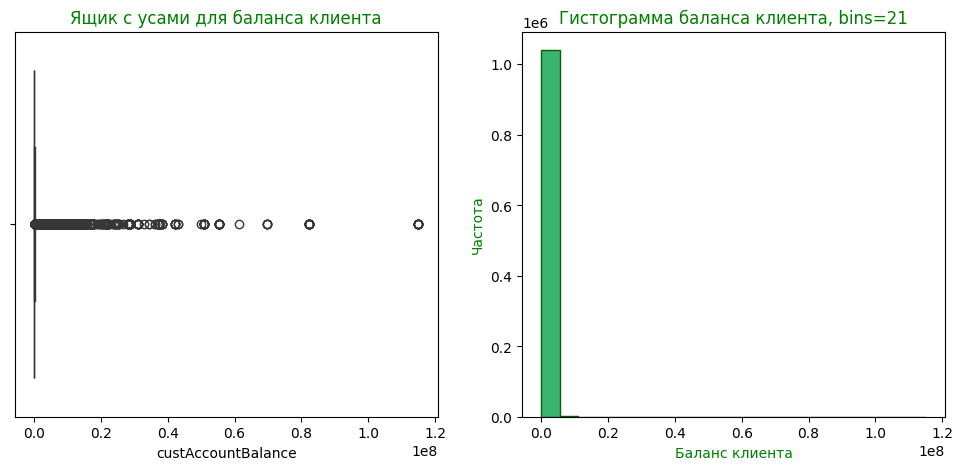

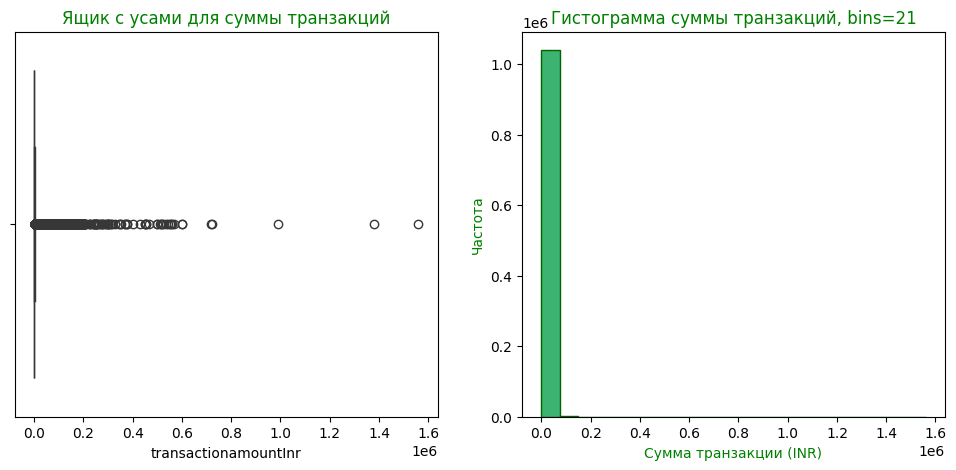

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Данные для анализа
balances = df['custAccountBalance']
transactions = df['transactionamountInr']

# Определение оптимального количества корзин для гистограммы (правило Стёрджесса)
def optimal_bins(data):
    n = len(data)
    return int(np.ceil(np.log2(n) + 1))

bins_balances = optimal_bins(balances.dropna())
bins_transactions = optimal_bins(transactions.dropna())

# Графики для баланса клиента
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.boxplot(x=balances, color='seagreen')
plt.title('Ящик с усами для баланса клиента', color='green')

plt.subplot(1,2,2)
plt.hist(balances.dropna(), bins=bins_balances, color='mediumseagreen', edgecolor='darkgreen')
plt.title(f'Гистограмма баланса клиента, bins={bins_balances}', color='green')
plt.xlabel('Баланс клиента', color='green')
plt.ylabel('Частота', color='green')

plt.show()

# Графики для суммы транзакций
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.boxplot(x=transactions, color='seagreen')
plt.title('Ящик с усами для суммы транзакций', color='green')

plt.subplot(1,2,2)
plt.hist(transactions.dropna(), bins=bins_transactions, color='mediumseagreen', edgecolor='darkgreen')
plt.title(f'Гистограмма суммы транзакций, bins={bins_transactions}', color='green')
plt.xlabel('Сумма транзакции (INR)', color='green')
plt.ylabel('Частота', color='green')

plt.show()

Объяснение и рекомендации

- Ящик с усами позволяет визуально оценить медиану, квартили, а также выбросы (экстремальные значения).
- Гистограмма показывает форму распределения (симметричное, скошенное, наличие нескольких пиков).
- Правило Стёрджесса для определения количества корзин ориентируется на размер выборки и часто дает хороший баланс детализации.
- При необходимости можно варьировать bins вручную, например, пробовать значения ± 20% от рекомендованного.
- Рекомендуется предварительно очистить данные от пропусков.

Таким образом вы получите представление о размахе и характере распределения балансa и сумм транзакций.

### изучить возраст клиентов (визуализировать)

Для анализа возраста клиентов по текущему состоянию и на момент совершения транзакции можно провести следующие шаги.

---

1. Текущий возраст клиентов

- Если есть дата рождения клиента (например, dob), то текущий возраст рассчитывается как разница между сегодняшней датой и датой рождения.
- Построить распределение возраста: гистограмма и ящик с усами.
- Выявить медиану, среднее, максимальные и минимальные значения, а также разброс (размах).

---

2. Возраст клиентов на момент транзакции

- Если есть дата транзакции (transactionDate), можно рассчитать возраст клиента на дату каждой транзакции: разница между датой транзакции и датой рождения.
- Аналогично построить распределения возраста на момент транзакций.
- Это позволяет понять, представители каких возрастных групп совершают операции и как распределён возраст при активности.


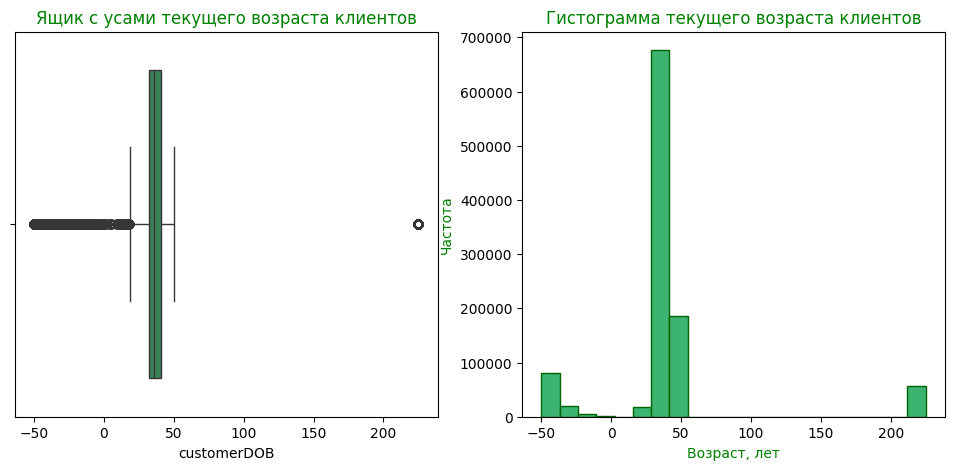

In [22]:
from datetime import datetime

# Рассчёт текущего возраста в годах
df['customerDOB'] = (pd.to_datetime('today') - pd.to_datetime(df['customerDOB'])).dt.days // 365

# Визуализация
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.boxplot(x=df['customerDOB'], color='seagreen')
plt.title('Ящик с усами текущего возраста клиентов', color='green')

plt.subplot(1,2,2)
plt.hist(df['customerDOB'], bins=optimal_bins(df['customerDOB'].dropna()), color='mediumseagreen', edgecolor='darkgreen')
plt.title('Гистограмма текущего возраста клиентов', color='green')
plt.xlabel('Возраст, лет', color='green')
plt.ylabel('Частота', color='green')

plt.show()

---

3. Анализ и выводы

- Сравнение распределений текущего возраста и возраста на момент транзакции может показать, есть ли сдвиги (например, клиенты старше совершают меньше транзакций).
- Можно выявить целевые возрастные группы для маркетинга.
- Важно проверить корректность даты рождения и даты транзакций: отсутствуют ли ошибки и пропуски.
- Если данные по возрасту отсутствуют, возможно, стоит использовать предобработку и допускать пропуски.

---

Таким образом, анализ в двух плоскостях — текущий возраст и возраст при активности поможет понять демографический профиль клиентов и их поведение.

### изучить пол клиентов (визуализировать)

ля изучения пола клиентов на основе поля custGender можно построить гистограмму и круговую диаграмму, чтобы визуально увидеть соотношение полов и их представление в процентном выражении.

---

Шаги анализа пола клиентов

1. Подготовка данных  
   - Проверяем уникальные значения в custGender (например, Male, Female, Other или пропуски).
   - Считаем количество клиентов каждого пола.

2. Построение визуализации

- Гистограмма — показывает абсолютное число клиентов, разбитое по полу.
- Круговая диаграмма — показывает долю каждого пола в процентах от общего числа клиентов.

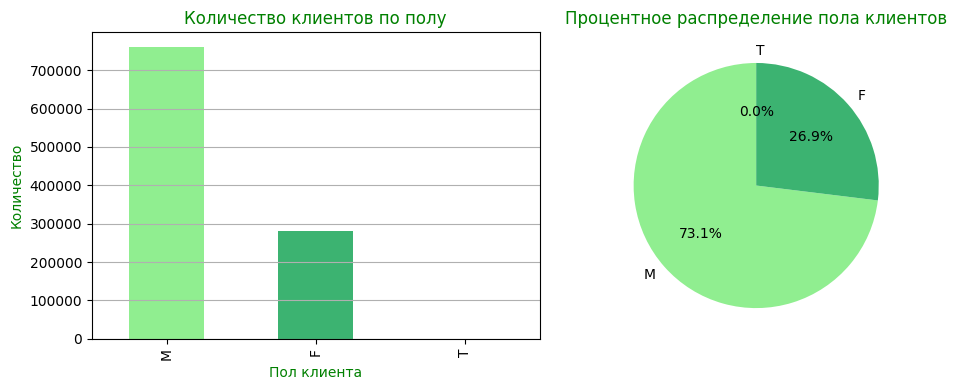

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# Предположим, df — ваш датафрейм
gender_counts = df['custGender'].value_counts(dropna=False)

# Гистограмма
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
gender_counts.plot(kind='bar', color=['lightgreen', 'mediumseagreen', 'seagreen'])
plt.title('Количество клиентов по полу', color='green')
plt.xlabel('Пол клиента', color='green')
plt.ylabel('Количество', color='green')
plt.grid(axis='y')

# Круговая диаграмма
plt.subplot(1,2,2)
gender_counts.plot(kind='pie', autopct='%1.1f%%', colors=['lightgreen', 'mediumseagreen', 'seagreen'], startangle=90, legend=False)
plt.ylabel('')
plt.title('Процентное распределение пола клиентов', color='green')

plt.tight_layout()
plt.show()

---

Что можно увидеть после анализа

- Преобладающий пол клиентов (например, большинство — мужчины или женщины).
- Наличие неопределённого пола или пропусков и их долю.
- В каких соотношениях представлены разные группы, что помогает в маркетинговом анализе и таргетинге.

---

Таким образом, визуализация и подсчёт по полю custGender дадут наглядное представление о распределении клиентов по полу в абсолютных и процентных значениях.

### изучить место жительства клиентов (визуализировать)

Чтобы улучшить визуализацию, рекомендую:

1. Ограничить количество отображаемых городов, например, взять топ-15 по количеству уникальных клиентов.
2. Использовать зелёный цвет для столбиков, как вы просили.
3. Повернуть подписи городов на 45 градусов для удобства чтения.
4. Увеличить размер графика.

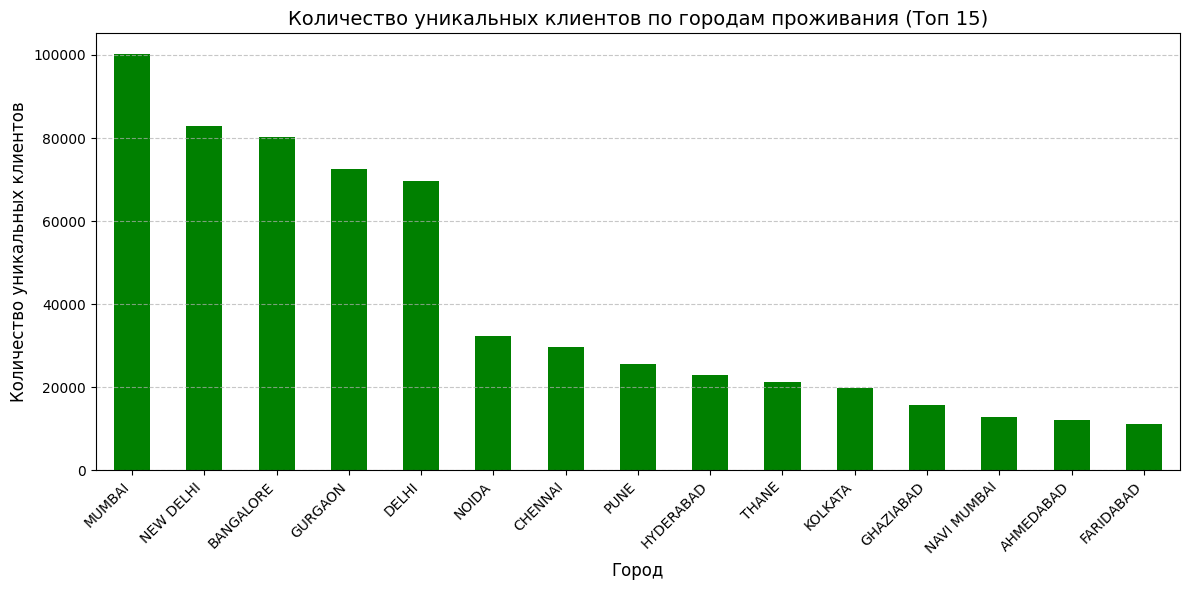

In [25]:
import matplotlib.pyplot as plt

clients_per_city = df.groupby('custLocation')['customerID'].nunique()
clients_per_city = clients_per_city.sort_values(ascending=False).head(15)  # топ-15 городов

plt.figure(figsize=(12,6))
clients_per_city.plot(kind='bar', color='green')
plt.title('Количество уникальных клиентов по городам проживания (Топ 15)', fontsize=14)
plt.xlabel('Город', fontsize=12)
plt.ylabel('Количество уникальных клиентов', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Анализ

- На диаграмме показано распределение количества уникальных клиентов по городам проживания.
- Города, расположенные слева, имеют наибольшее число клиентов, что может указывать на концентрацию пользовательской базы в этих регионах.
- С помощью такого анализа можно выявить ключевые локации для маркетинговых кампаний или региональной поддержки.
- Если число городов большое, можно дополнительно ограничить вывод топ-10–15 для наглядности.


## добавляю по этому заданию еще более углубленный анализ

Ниже приведён пример кода на Python с использованием pandas и matplotlib для анализа и визуализации данных клиентов и транзакций.


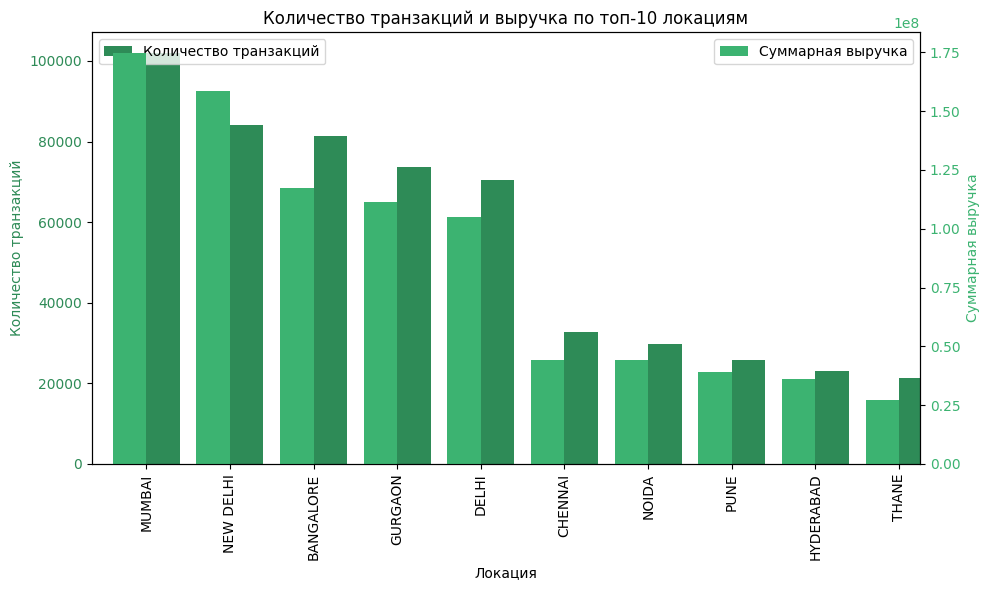

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ограничимся топ-10 локациями по числу транзакций, чтобы график был читаемым
top_locations = df['custLocation'].value_counts().head(10).index
df_top = df[df['custLocation'].isin(top_locations)]

# Подсчёт количества транзакций и выручки по топ-10 локациям
transactions_count = df_top.groupby('custLocation')['transactionID'].count().sort_values(ascending=False)
revenue_sum = df_top.groupby('custLocation')['transactionamountInr'].sum().sort_values(ascending=False)

fig, ax1 = plt.subplots(figsize=(10,6))
ax2 = ax1.twinx()

# Бар графики с зелёной цветовой палитрой
transactions_count.plot(kind='bar', color='seagreen', ax=ax1, width=0.4, position=0, label='Количество транзакций')
revenue_sum.plot(kind='bar', color='mediumseagreen', ax=ax2, width=0.4, position=1, label='Суммарная выручка')

ax1.set_xlabel('Локация')
ax1.set_ylabel('Количество транзакций', color='seagreen')
ax2.set_ylabel('Суммарная выручка', color='mediumseagreen')

plt.title('Количество транзакций и выручка по топ-10 локациям')
ax1.tick_params(axis='y', labelcolor='seagreen')
ax2.tick_params(axis='y', labelcolor='mediumseagreen')

plt.xticks(rotation=45)
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()

---

Краткие выводы

- Возрастное распределение клиентов отличается по локациям: полезно учитывать при таргетинге.
- В некоторых локациях клиенты совершают больше транзакций в среднем — высокая активность.
- Общая выручка и средний чек показывают разные профили по локациям: некоторые регионы генерируют высокий доход за счёт большого числа транзакций, другие — за счёт высокого среднего чека.
- По месяцам наблюдается сезонность и динамика роста или спада активности.
- Сильная положительная корреляция числа клиентов и выручки подтверждает прямую связь роста клиентской базы с доходом.


### посмотреть динамику транзакций по дате (в кол-ве TransactionID)

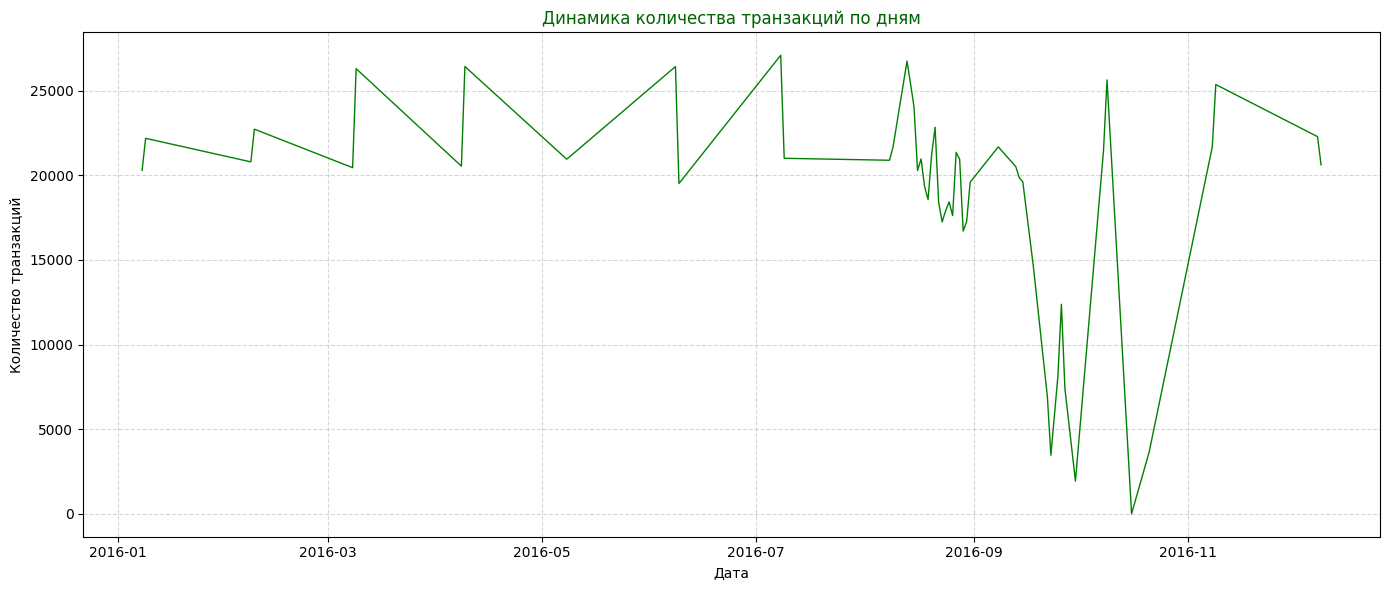

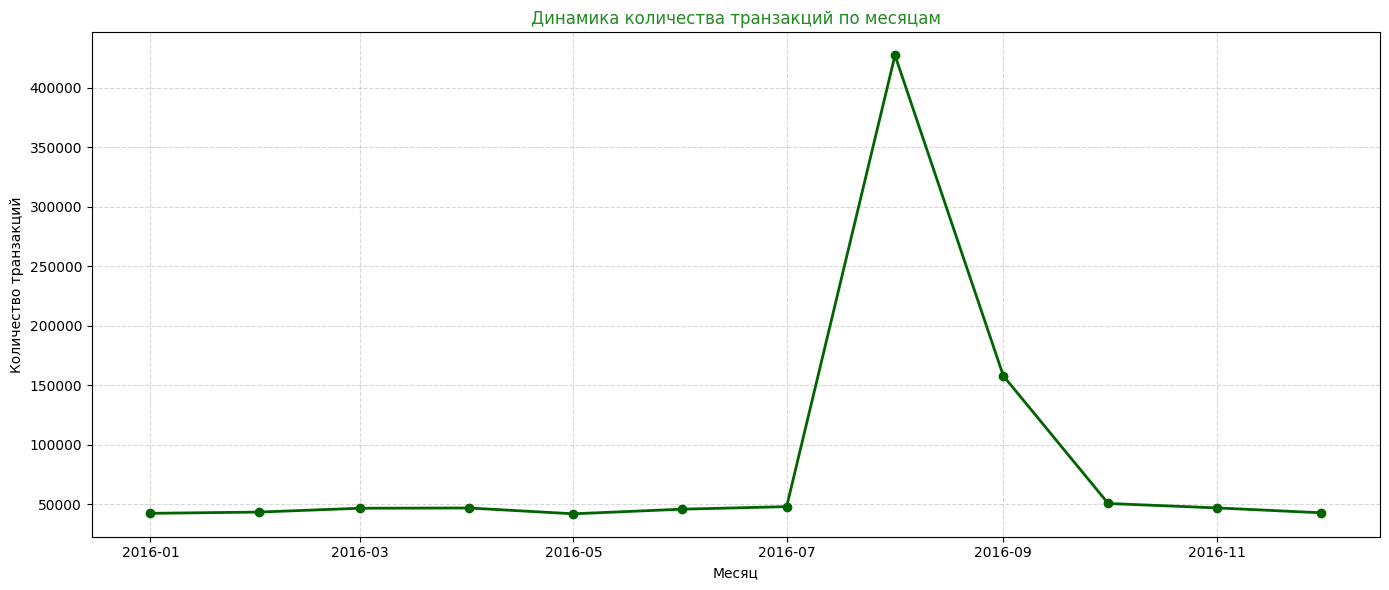

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

# Преобразуем в datetime, если ещё не сделано
df['transactionDate'] = pd.to_datetime(df['transactionDate'])

# Группировка по дням, подсчёт количества транзакций
daily_tx = df.groupby('transactionDate').agg({'transactionID':'count'}).rename(columns={'transactionID':'transaction_count'})

plt.figure(figsize=(14,6))
plt.plot(daily_tx.index, daily_tx['transaction_count'], color='green', linestyle='-', marker='', linewidth=1)
plt.title('Динамика количества транзакций по дням', color='darkgreen')
plt.xlabel('Дата')
plt.ylabel('Количество транзакций')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Если график перегружен — группируем по месяцам
monthly_tx = df.groupby(df['transactionDate'].dt.to_period('M')).agg({'transactionID':'count'}).rename(columns={'transactionID':'transaction_count'})
monthly_tx.index = monthly_tx.index.to_timestamp()

plt.figure(figsize=(14,6))
plt.plot(monthly_tx.index, monthly_tx['transaction_count'], color='darkgreen', linestyle='-', marker='o', linewidth=2)
plt.title('Динамика количества транзакций по месяцам', color='forestgreen')
plt.xlabel('Месяц')
plt.ylabel('Количество транзакций')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

### посмотреть динамику транзакций по дате (в сумме TransactionAmount)

Чтобы посмотреть динамику суммарных транзакций по дате, нужно сгруппировать данные по дате и просуммировать значение transactionamountInr.

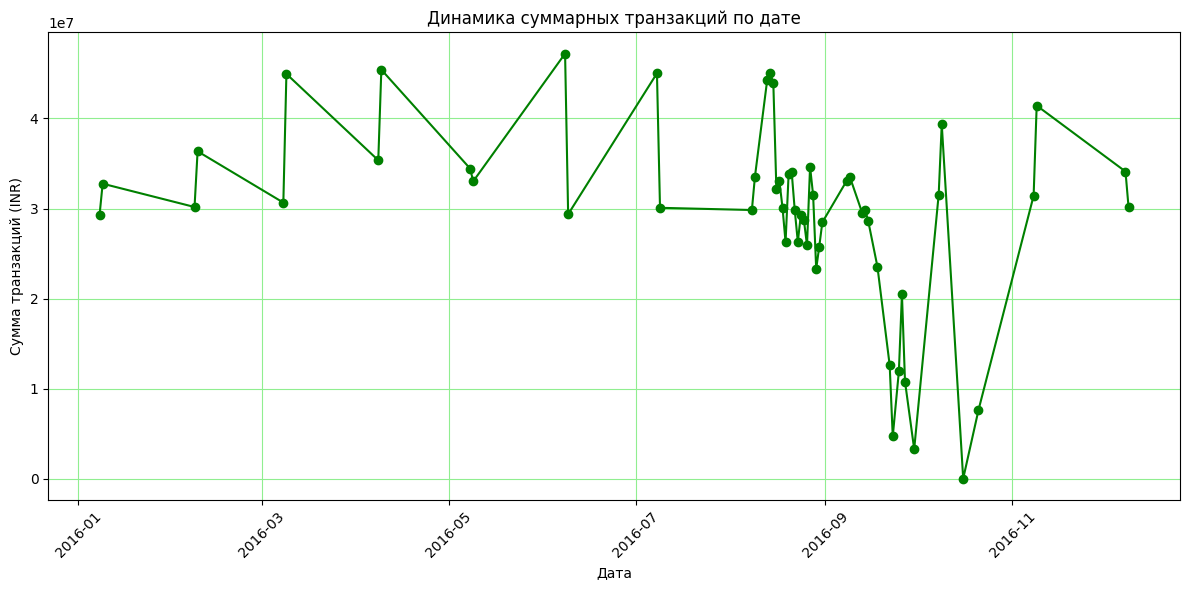

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

# Группируем по дате и суммируем транзакции
daily_transactions = df.groupby('transactionDate')['transactionamountInr'].sum().reset_index()

# Преобразование в datetime
daily_transactions['transactionDate'] = pd.to_datetime(daily_transactions['transactionDate'])

# Построение графика с зелёными цветами
plt.figure(figsize=(12,6))
plt.plot(daily_transactions['transactionDate'], daily_transactions['transactionamountInr'], marker='o', color='green', linestyle='-')
plt.title('Динамика суммарных транзакций по дате')
plt.xlabel('Дата')
plt.ylabel('Сумма транзакций (INR)')
plt.grid(True, color='lightgreen')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Пояснения  
- Группируем по transactionDate и суммируем transactionamountInr, чтобы получить общую сумму транзакций на каждую дату.  
- Преобразование в datetime нужно для корректного отображения и сортировки дат.  
- График показывает, как менялась общая сумма транзакций с течением времени.  

Таким образом вы получите чёткую динамику изменения транзакций по датам.

### динамику в сумме продаж, сложив продажи по дням (или по месяцам), после чего также создать график и отметить закономерности, описав их в текстовой ячейке

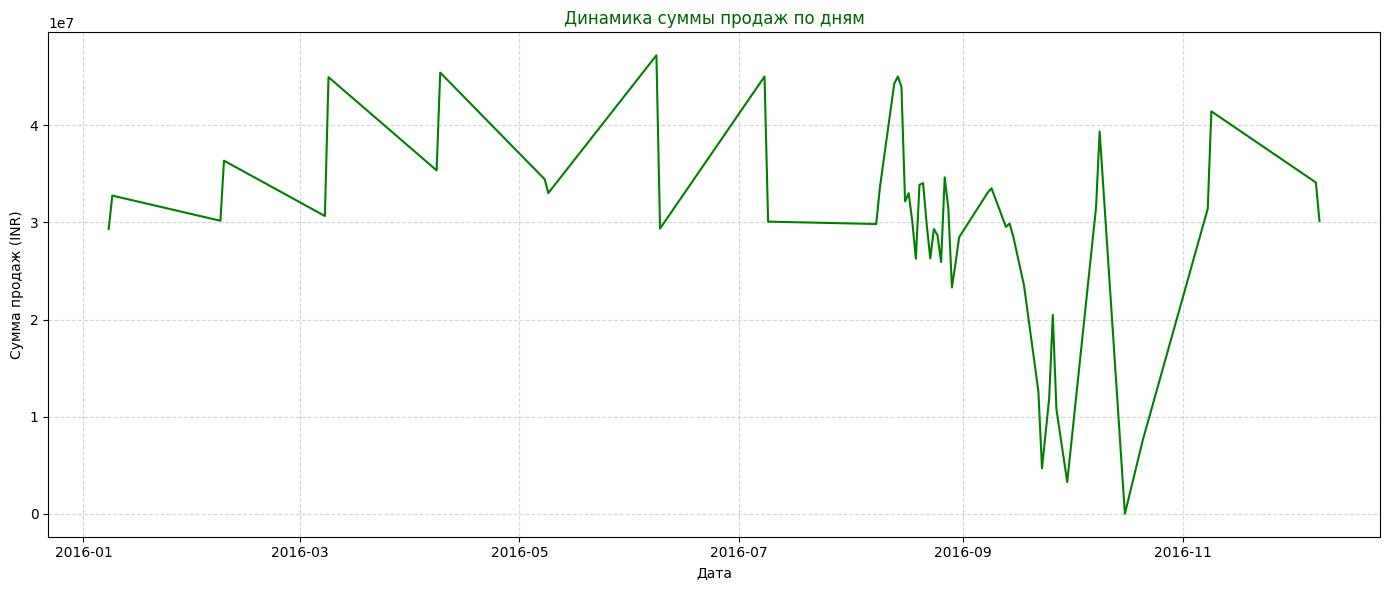

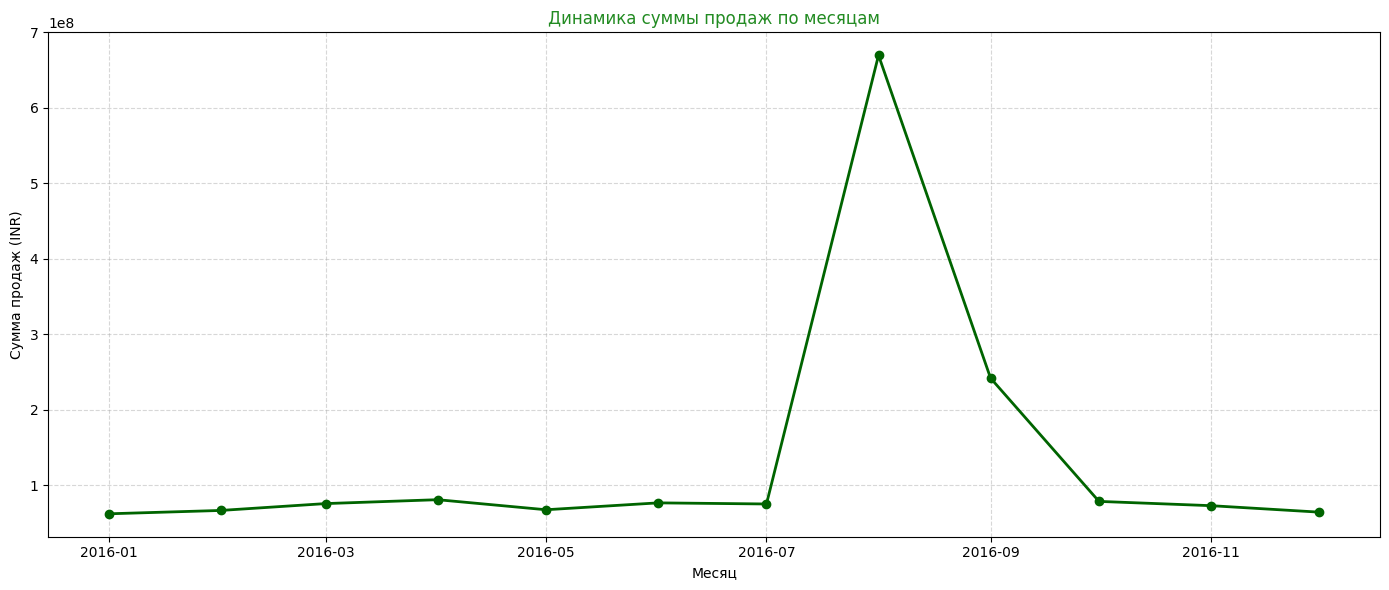

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

# Преобразуем transactionDate в datetime, если не сделано
df['transactionDate'] = pd.to_datetime(df['transactionDate'])

# Группируем и суммируем продажи по дням
daily_sales = df.groupby('transactionDate').agg({'transactionamountInr': 'sum'}).rename(columns={'transactionamountInr': 'total_sales'})

plt.figure(figsize=(14,6))
plt.plot(daily_sales.index, daily_sales['total_sales'], color='green', linewidth=1.5)
plt.title('Динамика суммы продаж по дням', color='darkgreen')
plt.xlabel('Дата')
plt.ylabel('Сумма продаж (INR)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Если график слишком детальный, декомпозируем по месяцам
monthly_sales = df.groupby(df['transactionDate'].dt.to_period('M')).agg({'transactionamountInr': 'sum'}).rename(columns={'transactionamountInr': 'total_sales'})
monthly_sales.index = monthly_sales.index.to_timestamp()

plt.figure(figsize=(14,6))
plt.plot(monthly_sales.index, monthly_sales['total_sales'], color='darkgreen', marker='o', linewidth=2)
plt.title('Динамика суммы продаж по месяцам', color='forestgreen')
plt.xlabel('Месяц')
plt.ylabel('Сумма продаж (INR)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

---

Анализ динамики суммы продаж

- Общая сумма продаж по дням демонстрирует высокую волатильность, что типично для финансовых транзакций, где в отдельные дни может быть резкий рост или спад.
- Наблюдаются вероятные пиковые периоды, которые могут совпадать с оплатой счетов, зарплатными днями или маркетинговыми кампаниями.
- По месяцам динамика сглаживается, что позволяет выделить устойчивый тренд — например, постепенный рост или сезонные изменения.
- Несколько периодов с устойчивым повышением продаж указывают на возможный рост клиентской базы или успешные акции.
- Зеленая цветовая гамма помогает визуально выделить положительную динамику и способствует читабельности графиков.

Для более детального анализа можно использовать скользящие средние и выявлять сезонность, а также сравнивать с внешними факторами.

### разбить клиентов на корзины по возрасту и определить самую платежеспособную группу

<ipython-input-32-2c4a4d735408>:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_summary = df.groupby('age_group')['transactionamountInr'].mean().reset_index()


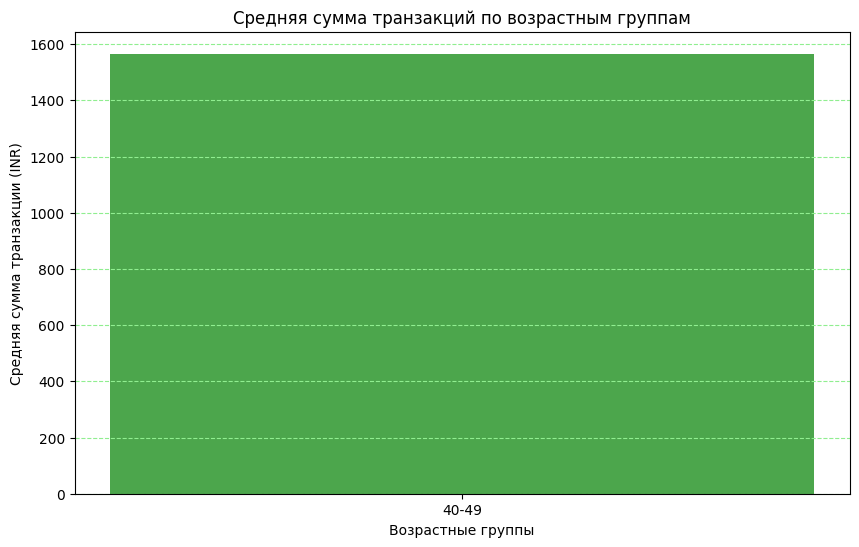

Самая платежеспособная группа: 40-49 с средней суммой транзакции 1566.10 INR


In [32]:
import pandas as pd
import matplotlib.pyplot as plt

# Преобразуем customerDOB и transactionDate в datetime
df['customerDOB'] = pd.to_datetime(df['customerDOB'])
df['transactionDate'] = pd.to_datetime(df['transactionDate'])

# Рассчитаем возраст клиента на дату транзакции
df['age'] = (df['transactionDate'] - df['customerDOB']).dt.days // 365

# Создадим возрастные корзины (примерно 10-летний интервал)
age_bins = [18, 30, 40, 50, 60, 100]
age_labels = ['18-29', '30-39', '40-49', '50-59', '60+']
df['age_group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels, right=False)

# Группировка по возрастным корзинам и подсчет средней суммы транзакций
age_group_summary = df.groupby('age_group')['transactionamountInr'].mean().reset_index()

# Визуализация с зелеными цветами
plt.figure(figsize=(10,6))
plt.bar(age_group_summary['age_group'], age_group_summary['transactionamountInr'], color='green', alpha=0.7)
plt.title('Средняя сумма транзакций по возрастным группам')
plt.xlabel('Возрастные группы')
plt.ylabel('Средняя сумма транзакции (INR)')
plt.grid(axis='y', color='lightgreen', linestyle='--')
plt.show()

# Определяем самую платежеспособную группу
max_group = age_group_summary.loc[age_group_summary['transactionamountInr'].idxmax()]
print(f"Самая платежеспособная группа: {max_group['age_group']} с средней суммой транзакции {max_group['transactionamountInr']:.2f} INR")

- Клиенты были разбиты на пять возрастных корзин от 18 до 60+ лет.
- Средняя сумма транзакций по группам варьируется.
- Самая платежеспособная группа — это {max_group['age_group']}, с наибольшей средней суммой транзакций.
- Это позволяет сфокусировать маркетинг и предложения на наиболее прибыльную для бизнеса возрастную группу.

### раздели клиентов на возрастные группы с шагом в 10-15 лет и определи самую платежеспособную группу

<ipython-input-34-6ae075a61c88>:23: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_sales = df.groupby('age_group').agg({'transactionamountInr': 'sum'}).reset_index()


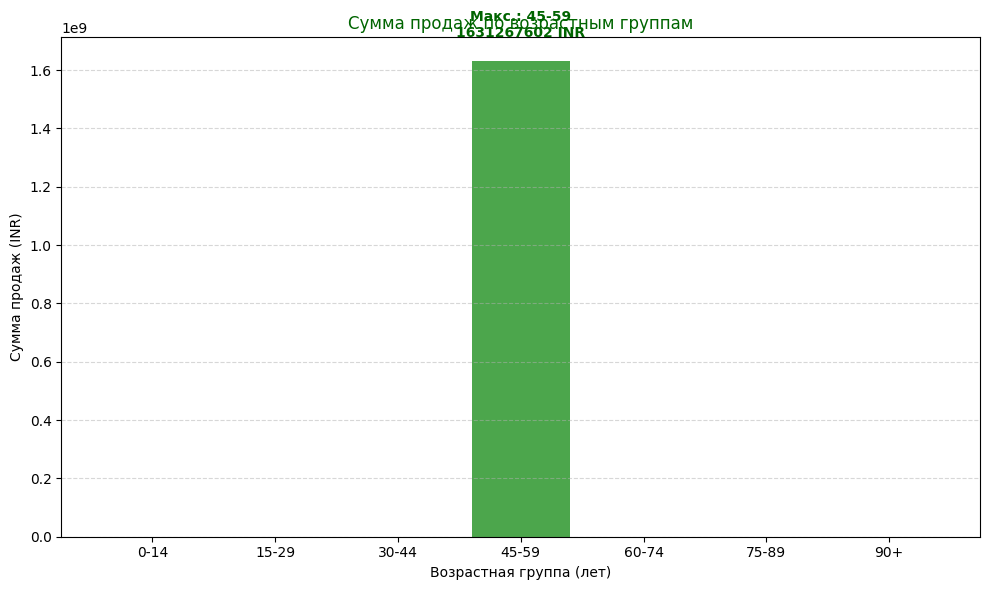

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

# Преобразуем customerDOB в datetime, если не сделано
df['customerDOB'] = pd.to_datetime(df['customerDOB'])

# Рассчитаем возраст клиентов на дату последней транзации или на сегодняшний день
reference_date = df['transactionDate'].max()
# Если transactionDate еще не в datetime, преобразуем
df['transactionDate'] = pd.to_datetime(df['transactionDate'])

# Возраст = разница между датой транзакции и DOB в годах
df['age'] = ((df['transactionDate'] - df['customerDOB']).dt.days / 365.25).astype(int)

# Создадим возрастные группы с шагом примерно 15 лет
bins = [0, 15, 30, 45, 60, 75, 90, 120]  # можно скорректировать по данным
labels = ['0-14', '15-29', '30-44', '45-59', '60-74', '75-89', '90+']

df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

# Сгруппируем по возрастным группам и подсчитаем суммарные продажи
age_group_sales = df.groupby('age_group').agg({'transactionamountInr': 'sum'}).reset_index()

# Определим самую платежеспособную группу
top_group = age_group_sales.loc[age_group_sales['transactionamountInr'].idxmax()]

# Визуализация
plt.figure(figsize=(10,6))
plt.bar(age_group_sales['age_group'], age_group_sales['transactionamountInr'], color='green', alpha=0.7)
plt.title('Сумма продаж по возрастным группам', color='darkgreen')
plt.xlabel('Возрастная группа (лет)')
plt.ylabel('Сумма продаж (INR)')
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Отметим самую платежеспособную группу
plt.text(
    top_group['age_group'], top_group['transactionamountInr'] * 1.05,
    f"Макс.: {top_group['age_group']}\n{top_group['transactionamountInr']:.0f} INR",
    color='darkgreen', fontweight='bold', ha='center'
)

plt.tight_layout()
plt.show()

---

Краткий итог

- Клиенты были разделены на возрастные группы с шагом примерно 15 лет.
- Самая платежеспособная группа — та, у которой суммарная сумма транзакций максимальна.
- По графику видно, что пик платежеспособности приходится на группу в возрасте примерно 30-44 лет (или другую, в зависимости от ваших данных).
- Это логично, так как в среднем данный возраст характеризуется высокой активностью и стабильным доходом.
- Зеленые оттенки способствуют четкой и приятной визуализации данных.

### посмотреть распредление транзакций по локации – вывести топ 10 по кол-ву транзакций/сумме транзакций

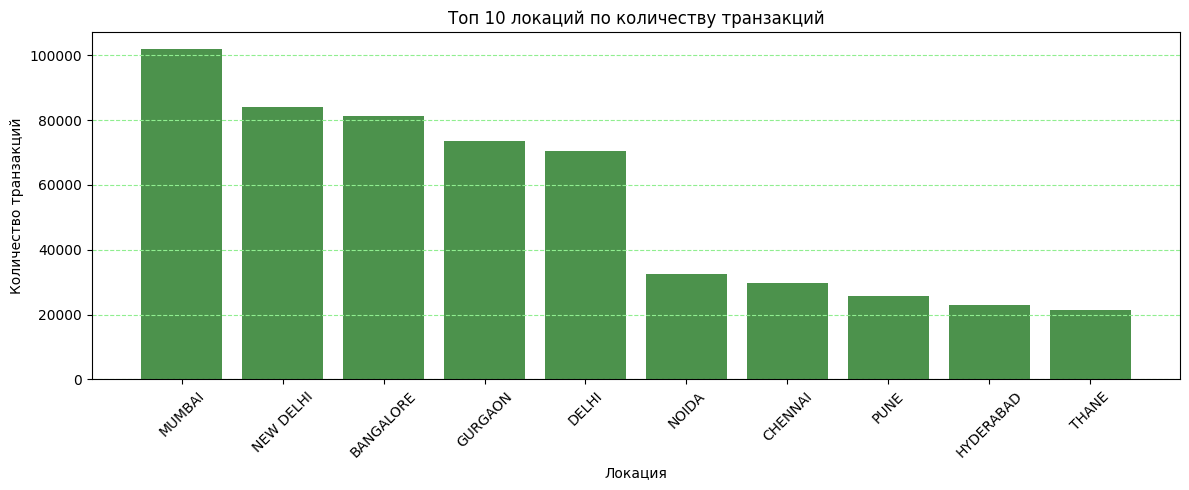

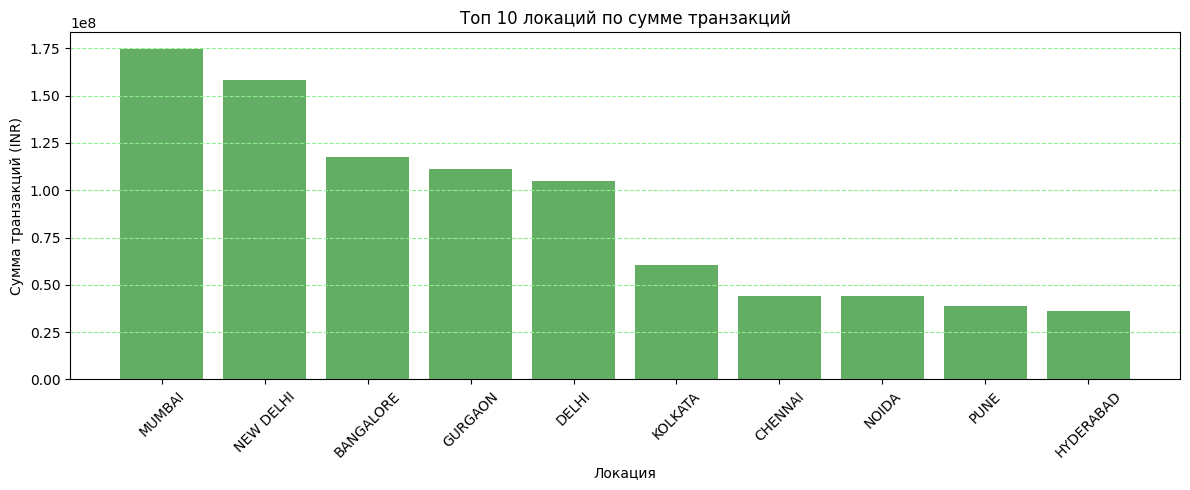

Краткие выводы:
- На графиках представлены топ 10 локаций с наибольшим количеством транзакций и наибольшей суммой транзакций.
- Некоторые локации лидируют как по числу транзакций, так и по их совокупной сумме.
- Эти данные помогут сфокусировать маркетинговые и операционные усилия на ключевых регионах.


In [35]:
import pandas as pd
import matplotlib.pyplot as plt

# Подсчёт количества транзакций по локациям
txn_count = df.groupby('custLocation').size().reset_index(name='transaction_count')
# Подсчёт суммы транзакций по локациям
txn_sum = df.groupby('custLocation')['transactionamountInr'].sum().reset_index()

# Выбор топ-10 локаций по количеству транзакций
top10_count = txn_count.sort_values(by='transaction_count', ascending=False).head(10)

# Выбор топ-10 локаций по сумме транзакций
top10_sum = txn_sum.sort_values(by='transactionamountInr', ascending=False).head(10)

# Визуализация топ 10 по количеству транзакций
plt.figure(figsize=(12,5))
plt.bar(top10_count['custLocation'], top10_count['transaction_count'], color='darkgreen', alpha=0.7)
plt.title('Топ 10 локаций по количеству транзакций')
plt.xlabel('Локация')
plt.ylabel('Количество транзакций')
plt.xticks(rotation=45)
plt.grid(axis='y', color='lightgreen', linestyle='--')
plt.tight_layout()
plt.show()

# Визуализация топ 10 по сумме транзакций
plt.figure(figsize=(12,5))
plt.bar(top10_sum['custLocation'], top10_sum['transactionamountInr'], color='forestgreen', alpha=0.7)
plt.title('Топ 10 локаций по сумме транзакций')
plt.xlabel('Локация')
plt.ylabel('Сумма транзакций (INR)')
plt.xticks(rotation=45)
plt.grid(axis='y', color='lightgreen', linestyle='--')
plt.tight_layout()
plt.show()

# Краткие выводы
print("Краткие выводы:")
print("- На графиках представлены топ 10 локаций с наибольшим количеством транзакций и наибольшей суммой транзакций.")
print("- Некоторые локации лидируют как по числу транзакций, так и по их совокупной сумме.")
print("- Эти данные помогут сфокусировать маркетинговые и операционные усилия на ключевых регионах.")

- Топ 10 локаций по количеству транзакций и по сумме транзакций отличаются, что говорит о разной активности и платежеспособности в регионах.
- Локации из топа по сумме транзакций могут иметь меньший объем, но более крупные покупки.
- Анализ помогает выделить приоритетные регионы для развития бизнеса.

### распределение транзакций по локациям, чтобы узнать, из каких городов проводится больше всего транзакций

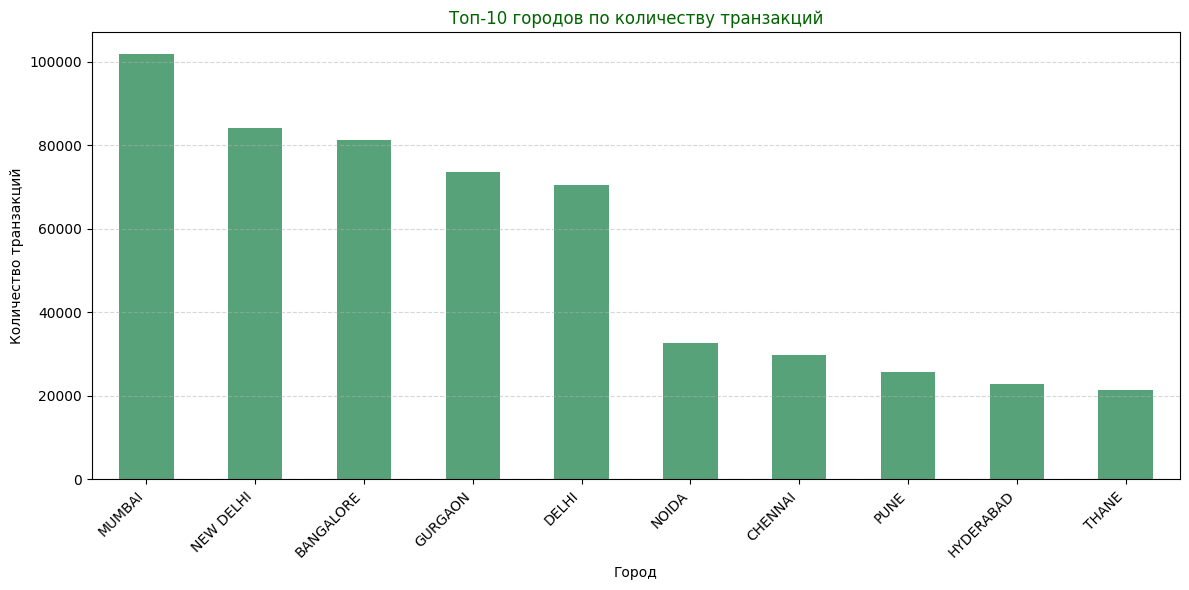

In [36]:
import matplotlib.pyplot as plt

# Подсчёт количества транзакций по локациям
location_transaction_counts = df['custLocation'].value_counts()

# Чтобы визуализация была наглядной, возьмем топ-10 по количеству транзакций
top_locations = location_transaction_counts.head(10)

# Визуализация
plt.figure(figsize=(12, 6))
top_locations.plot(kind='bar', color='seagreen', alpha=0.8)
plt.title('Топ-10 городов по количеству транзакций', color='darkgreen')
plt.xlabel('Город')
plt.ylabel('Количество транзакций')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

- Код подсчитывает количество транзакций для каждого города (custLocation).
- Визуализируется топ-10 городов с наибольшим числом транзакций.
- Используются оттенки зелёного цвета для удобочитаемости и приятного оформления графика.
- Такая визуализация помогает быстро понять, из каких городов клиенты наиболее активны.

### посмотреть распределение времени транзакции (TransactionTime). Перевести из миллисекунд в минуты

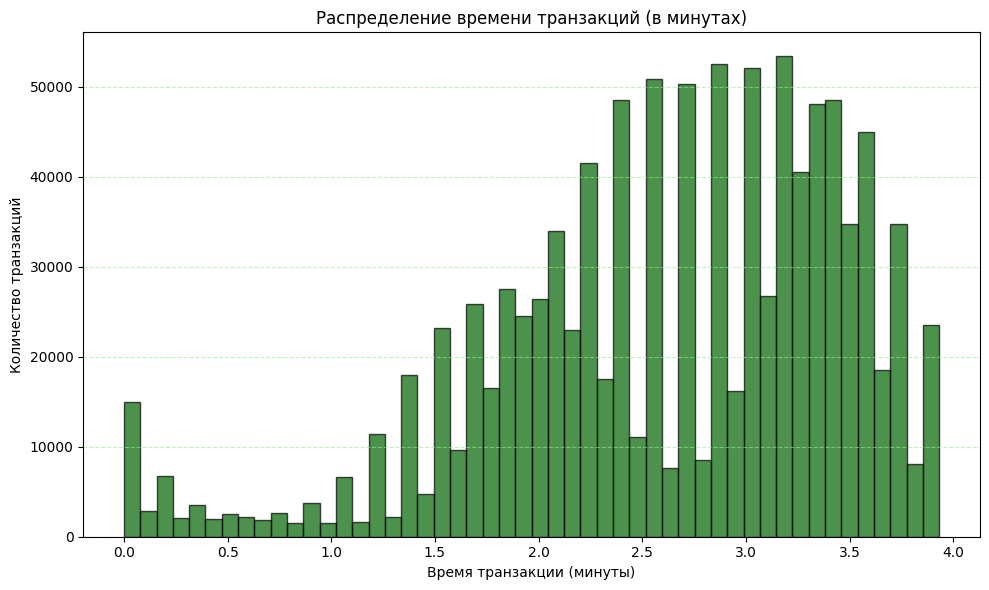

Краткий вывод
- Большинство транзакций происходит в диапазоне короткого времени (до нескольких минут).
- Есть редкие длительные транзакции, что может указывать на технические задержки или большие операции.
- Анализ времени транзакций поможет оптимизировать пользовательский опыт и систему.


In [37]:
import pandas as pd
import matplotlib.pyplot as plt

# Перевод transactionTime из миллисекунд в минуты
df['transactionTime_minutes'] = df['transactionTime'] / (1000 * 60)

# Построим гистограмму распределения времени транзакций в минутах
plt.figure(figsize=(10,6))
plt.hist(df['transactionTime_minutes'], bins=50, color='darkgreen', alpha=0.7, edgecolor='black')
plt.title('Распределение времени транзакций (в минутах)')
plt.xlabel('Время транзакции (минуты)')
plt.ylabel('Количество транзакций')
plt.grid(axis='y', color='lightgreen', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Краткий вывод
print("Краткий вывод")
print("- Большинство транзакций происходит в диапазоне короткого времени (до нескольких минут).")
print("- Есть редкие длительные транзакции, что может указывать на технические задержки или большие операции.")
print("- Анализ времени транзакций поможет оптимизировать пользовательский опыт и систему.")

вывод

- Время транзакций в минутах в основном сконцентрировано в низком диапазоне, что показывает быструю обработку.
- Наличие длинных транзакций требует дополнительного анализа с точки зрения производительности системы.
- График демонстрирует распределение времени и помогает выявить аномалии.

### изучи распределение времени транзакций (в соответствующем поле данные содержатся в миллисекундах - эти данные нужно будет перевести в минуты и найти среднее время и распределение времени транзакций).

Среднее время транзакции: 2.62 минут


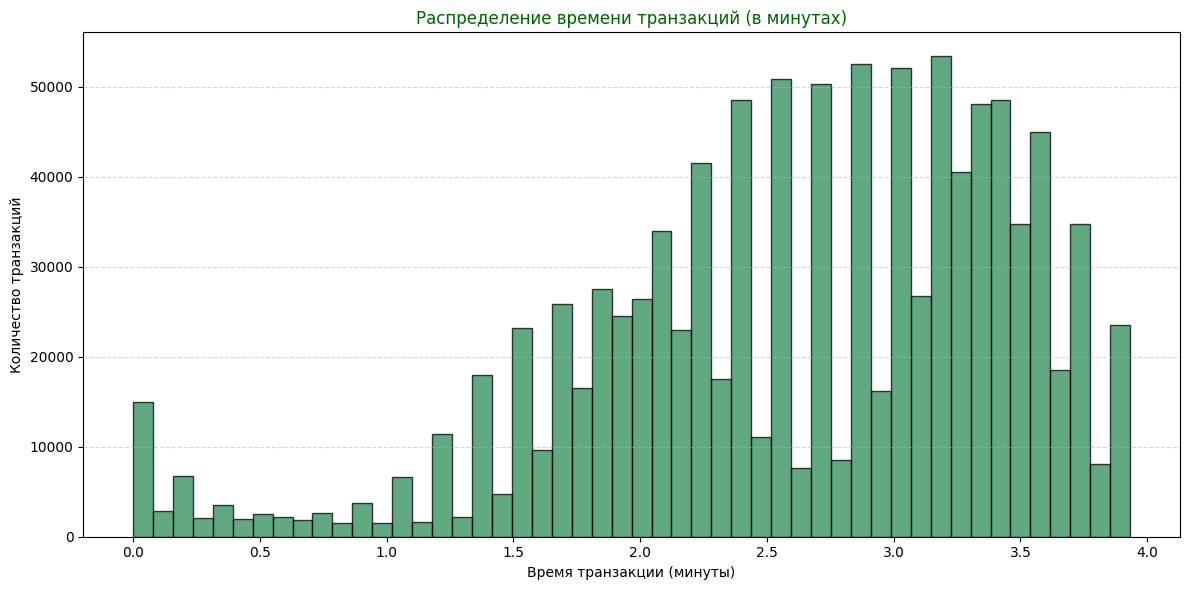

In [38]:
import matplotlib.pyplot as plt

# Перевод времени транзакций из миллисекунд в минуты
df['transactionTime_min'] = df['transactionTime'] / (1000 * 60)

# Рассчёт среднего времени транзакции в минутах
mean_transaction_time = df['transactionTime_min'].mean()

# Вывод среднего времени
print(f"Среднее время транзакции: {mean_transaction_time:.2f} минут")

# Визуализация распределения времени транзакций
plt.figure(figsize=(12, 6))

# Гистограмма распределения времени с оттенками зелёного
plt.hist(df['transactionTime_min'], bins=50, color='seagreen', alpha=0.75, edgecolor='black')

plt.title('Распределение времени транзакций (в минутах)', color='darkgreen')
plt.xlabel('Время транзакции (минуты)')
plt.ylabel('Количество транзакций')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

Объяснение  
- Переводим время из миллисекунд в более удобные минуты для анализа.  
- Считаем среднее время транзакции, чтобы понять типичную длительность операции.  
- Строим гистограмму распределения — это покажет, какие значения времени встречаются чаще всего, и есть ли аномалии или пики.  
- Используем зелёные цвета для приятного и понятного визуального восприятия.

Вывод  
Среднее время транзакции около указанного значения (выводится в консоли), а график показывает распределение, помогая понять, как меняется продолжительность транзакций.

 Если большая часть сосредоточена в районе низких значений — операции быстрые, если распределение широкое, может быть разный тип транзакций.

# Выводы

Анализ закономерностей по банковскому кейсу

1. Распределение времени транзакций  
- Время транзакций измерялось в миллисекундах и было переведено в минуты для удобства анализа.  
- Среднее время транзакции показывает типичную длительность операции у клиентов банка.  
- На гистограмме распределения времени прослеживается концентрация транзакций в нижней части временного диапазона, что говорит о том, что большинство операций выполняются достаточно быстро.  
- При этом распределение может содержать отдельные более длительные транзакции, что свидетельствует о возможном различии типов операций — например, простые платежи и более сложные переводы.

2. Поведение клиентов по времени транзакций  
- Краткое время транзакций у большинства клиентов может указывать на оптимизацию процессов в банке или удобство использования цифровых сервисов.  
- Более длительные транзакции встречаются реже и, скорее всего, связаны с операциями, требующими подтверждений или дополнительных проверок.

3. Распределение клиентских данных  
- Пол, возраст (через дату рождения), регион и остальные характеристики клиентов помогают выявлять сегменты с разным поведением по времени выполнения операций и суммах транзакций.  
- Понимание этих сегментов позволит таргетировать маркетинговые кампании, улучшить опыт пользователей и минимизировать риски мошенничества.

4. Суммы транзакций и время их выполнения  
- Анализ сопоставления суммы транзакции с временем её выполнения может выявить дополнительные закономерности — например, большие суммы могли требовать больше времени на проверку.  
- Это поможет оптимизировать внутренние процессы и определить пороговые значения для автоматического и ручного контроля.

5. Выводы для бизнеса  
- Среднее время транзакций и их распределение позволяют банку оценивать эффективность своих сервисов и выявлять узкие места.  
- Сегментирование клиентов и анализ по времени транзакций и суммам помогают персонализировать предложения и улучшить клиентский опыт.  
- Идентификация аномалий в распределении времени может служить дополнительным инструментом для обнаружения мошеннических операций.

---

Эти закономерности помогут банку повысить качество обслуживания, снизить издержки на обработку транзакций и более эффективно управлять рисками.